# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [84]:
# read the iris data into a pandas DataFrame, including column names
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv('iris.csv', names = columns, header=None,skiprows=1)
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Task 2

In [87]:
# gather basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Task 3

In [102]:
# use groupby to look for differences between the species
# df['species'] = pd.to_numeric(df['species'], errors='coerce')
#df.groupby('species')[['sepal_length']].sum()

df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [94]:
# use sorting to look for differences between the species
df.sort_values(by='sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica


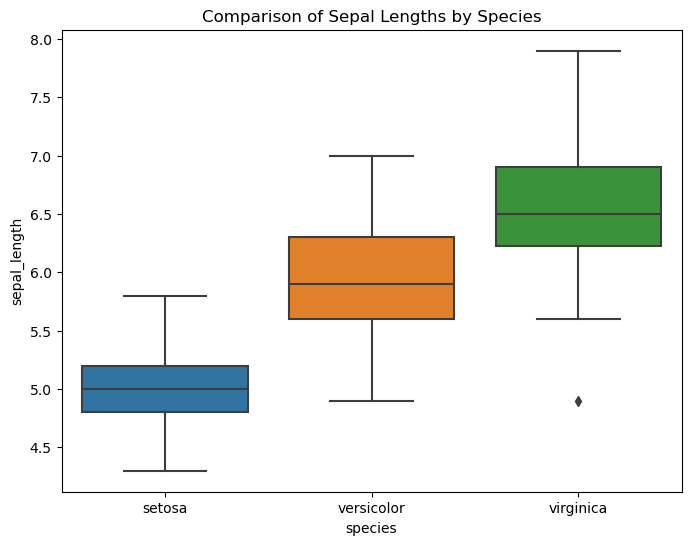

In [104]:
# use plotting to look for differences between the species
import matplotlib.pyplot as plt
import seaborn as sns


df['sepal_length'] = pd.to_numeric(df['sepal_length'], errors='coerce')
df_numeric = df.select_dtypes(include=[np.number])
df_numeric


plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Comparison of Sepal Lengths by Species')
plt.show()



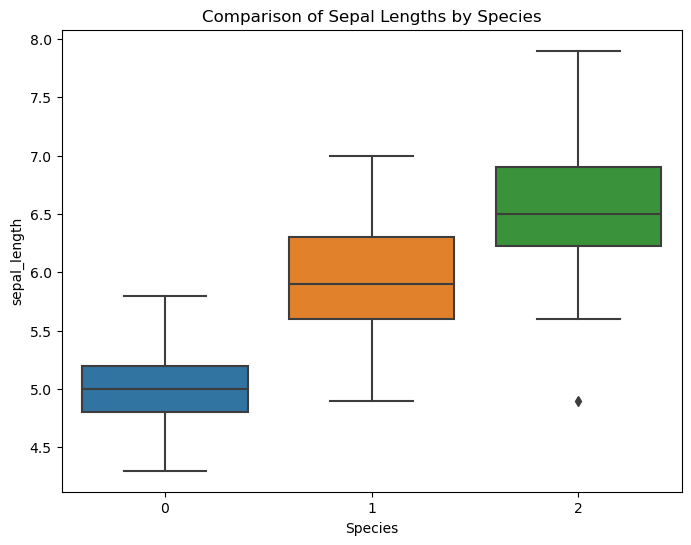

In [108]:
# map species to a numeric value so that plots can be colored by category
df['species_numeric'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
plt.figure(figsize=(8, 6))
sns.boxplot(x='species_numeric', y='sepal_length', data=df)
# plt.xticks([0, 1, 2], ['setosa', 'versicolor', 'virginica']) 
plt.xlabel('Species')
plt.title('Comparison of Sepal Lengths by Species')
plt.show()

## Task 4

## Bonus

In [126]:
# define function that accepts a row of data and returns a predicted species
def predict_species(row):
    sepal_length = row['sepal_length']
    sepal_width = row['sepal_width']
    
    if sepal_length <= 5.1 and sepal_width <= 3.6:
        return 'predicted-setosa'
    elif sepal_length > 5.0 and sepal_length <= 5.8:
        return 'predicted-versicolor'
    else:
        return 'predicted-virginica'

predicted_species = df.apply(predict_species, axis=1)

df['predicted_species'] = predicted_species
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_numeric,predicted_species
0,5.1,3.5,1.4,0.2,setosa,0,predicted-setosa
1,4.9,3.0,1.4,0.2,setosa,0,predicted-setosa
2,4.7,3.2,1.3,0.2,setosa,0,predicted-setosa
3,4.6,3.1,1.5,0.2,setosa,0,predicted-setosa
4,5.0,3.6,1.4,0.2,setosa,0,predicted-setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,predicted-virginica
146,6.3,2.5,5.0,1.9,virginica,2,predicted-virginica
147,6.5,3.0,5.2,2.0,virginica,2,predicted-virginica
148,6.2,3.4,5.4,2.3,virginica,2,predicted-virginica
